## Part2: Training a neural network

## Imports

In [12]:
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow as tf
%run utils.ipynb import *

## Prepare the data

In [13]:
# load training data
train = read_data('train.csv')
# load testing data
test = read_data('test.csv')

In [14]:
# clean the data
X_train_scaled, y_train_encoded, X_test_scaled, y_train_unique_length = clean_data(train, test)

### Hyperparameters settings #2 : Batch size Tuning

We will explore first hyperparameter which is **Batch size** while keeping all other hyperparameters fixed

In [15]:
batch_size = [32, 64, 128, 256]
HIDDEN_SIZE = 128
LEARNING_RATE = 8e-2
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
DROPOUT_RATE = 0
DROPOUT = False

### Training the model #2

Start training for Batch size = 32

The Evaluation of the model on the train data is:
Train loss = 0.023264259099960327
Train accuracy = 0.9949495196342468

End training for Batch size = 32

Start training for Batch size = 64

The Evaluation of the model on the train data is:
Train loss = 0.03800884261727333
Train accuracy = 0.991919219493866

End training for Batch size = 64

Start training for Batch size = 128

The Evaluation of the model on the train data is:
Train loss = 0.04675756022334099
Train accuracy = 0.9909090995788574

End training for Batch size = 128

Start training for Batch size = 256

The Evaluation of the model on the train data is:
Train loss = 0.06071418896317482
Train accuracy = 0.9949495196342468

End training for Batch size = 256



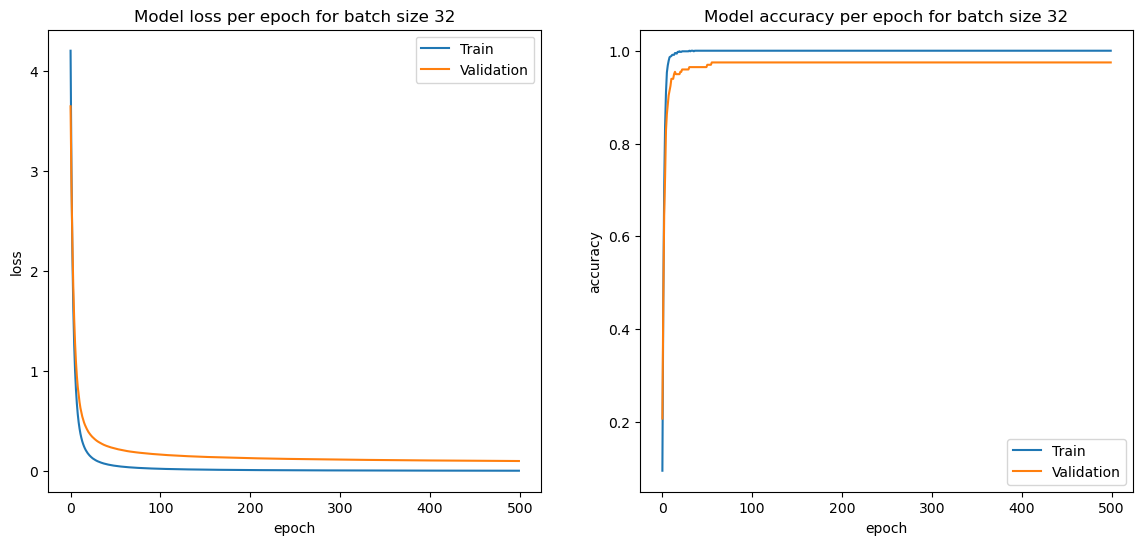

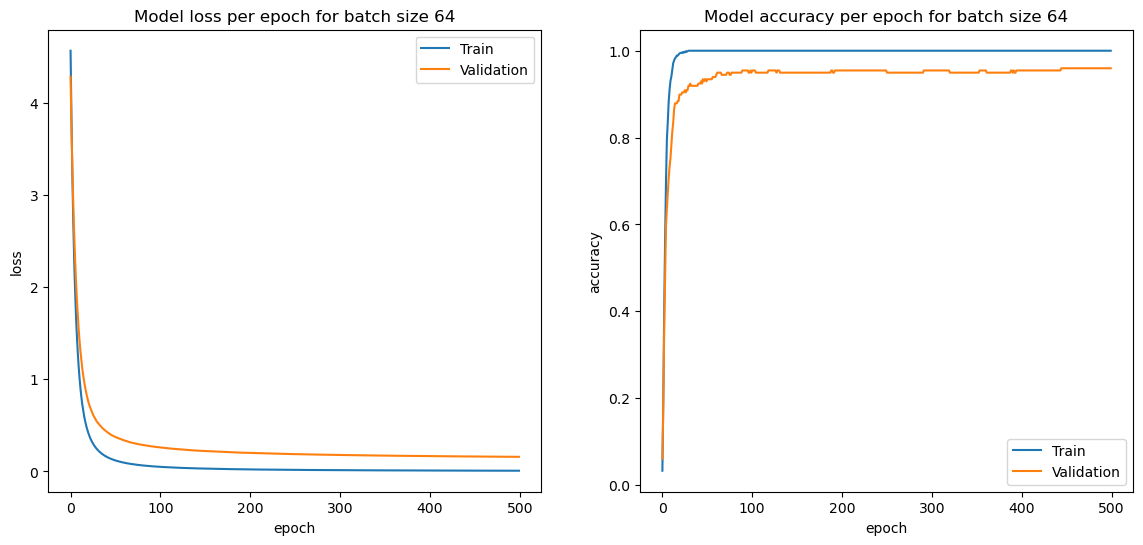

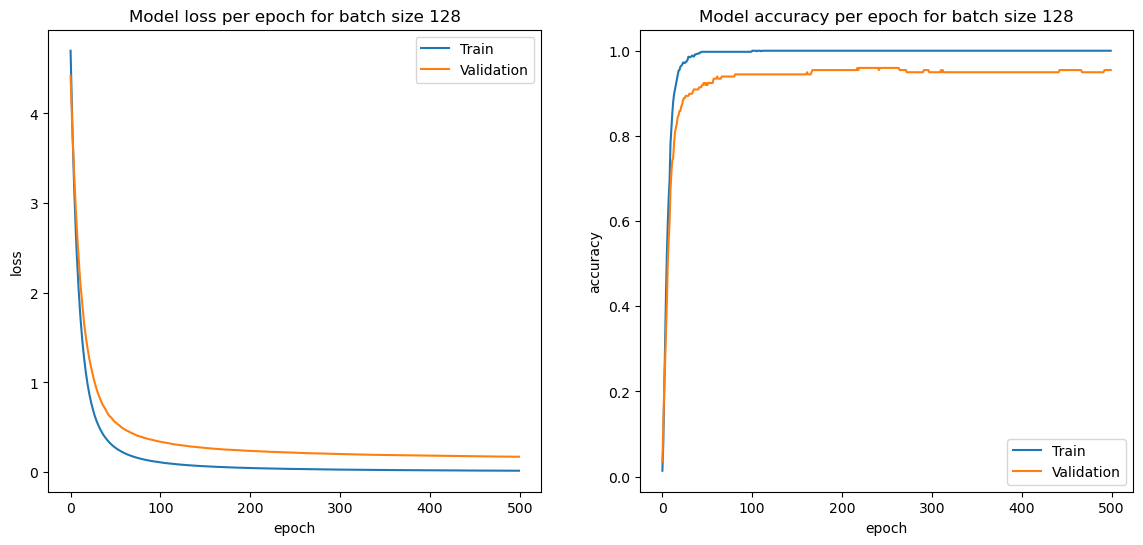

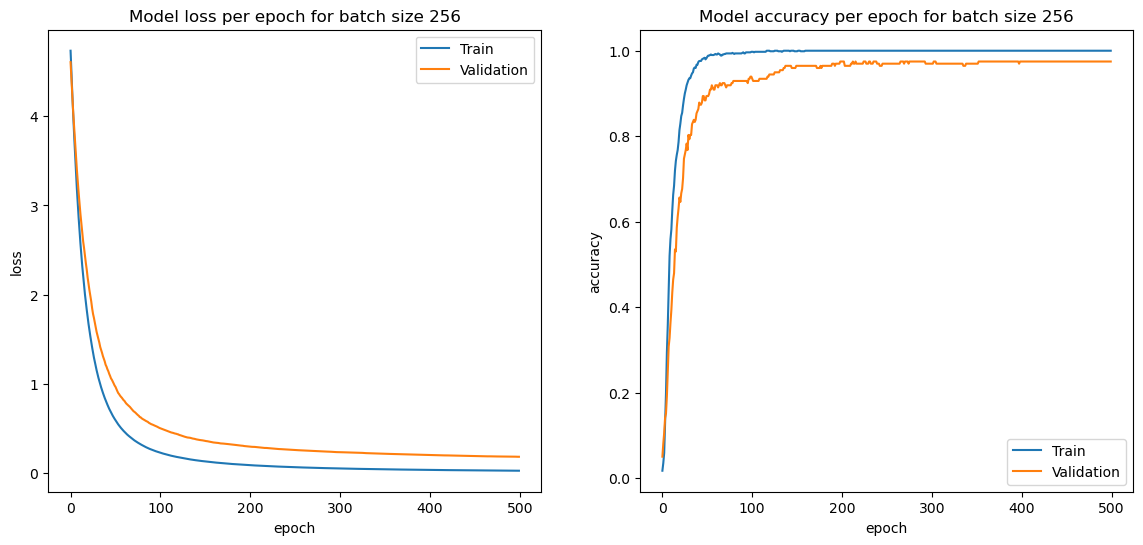

In [17]:
for batch in batch_size:
    print('Start training for Batch size =', str(batch))
    model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), batch, 
                       OPTIMIZER, None,None)
    train_curves(history,'for batch size',batch)
    loss, acc = evaluation(model= model, X= X_train_scaled, y= y_train_encoded, batch_size= batch)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for Batch size =', str(batch) + '\n')

So, from above the best batch size to be used is **32**